### Preprocessing 

In [15]:

import pandas as pd
import numpy as np 
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,accuracy_score,f1_score,precision_score,recall_score
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC,Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import LinearSVC
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import precision_score,recall_score,auc




In [16]:
import warnings
warnings.filterwarnings("ignore")

#### Loading the data set

In [17]:
train_data = pd.read_csv("/Users/sarath/Documents/Final Project Data/train_values.csv")
train_labels = pd.read_csv("/Users/sarath/Documents/Final Project Data/train_labels.csv")
test_labels = pd.read_csv("/Users/sarath/Documents/Final Project Data/test_values.csv")

In [8]:
train_data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [21]:
train_data.shape

(260601, 39)

In [22]:
train_data.head(1)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0


In [23]:
train_data.isna().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [4]:
train_labels.head(1)

,building_id,damage_grade
0,802906,3


In [18]:
train_labels['building_id'].equals(train_data['building_id'])

True

In [19]:
building_damage1 = train_data.merge(train_labels, how = 'inner', on = 'building_id')

In [ ]:
building_damage1.describe()

#### Define Unique Feature

In [11]:
def feature_info(feature):
    print('Unique values in the feature:',feature.unique())
    print('No of Null values:',feature.isna().sum())

In [113]:
feature_info(building_damage1.foundation_type)

Unique values in the feature: ['r' 'w' 'i' 'u' 'h']
No of Null values: 0


In [114]:
feature_info(building_damage1.geo_level_1_id)

Unique values in the feature: [ 6  8 21 22 11  9 20  0 26 17 12 18  4 27 25 10  7  3 13 30 16  5 15 14
 19  1 24 28 23  2 29]
No of Null values: 0


In [159]:
feature_info(building_damage.count_floors_pre_eq)

Unique values in the feature: [2 3 1 4 5 6 7 8 9]
No of Null values: 0


In [115]:
feature_info(building_damage1.damage_grade)

Unique values in the feature: [3 2 1]
No of Null values: 0


In [116]:
feature_info(building_damage1.foundation_type)

Unique values in the feature: ['r' 'w' 'i' 'u' 'h']
No of Null values: 0


In [7]:
#building_damage.isnull()

### Data Preparation

In [20]:
from functools import reduce

In [21]:
building_damage1 = building_damage1.drop(columns ="has_secondary_use")

In [22]:
building_damage1 = building_damage1.drop(columns ="has_secondary_use_agriculture")

In [119]:
building_damage1.isna().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [23]:
building_damage = building_damage1[building_damage1['age'] <= 250]

In [10]:
building_damage['damage_grade'].value_counts()



2    147437
3     86829
1     24945
Name: damage_grade, dtype: int64

In [12]:
print('Shape of final raw data matrix:',building_damage.shape)
print('No of labels:',len(building_damage))
feature_info(building_damage.damage_grade)


Shape of final raw data matrix: (259211, 38)
No of labels: 259211
Unique values in the feature: [3 2 1]
No of Null values: 0


In [13]:

feature_info(building_damage.land_surface_condition)

Unique values in the feature: ['t' 'o' 'n']
No of Null values: 0


In [14]:
print('Training data :',building_damage.shape)
print('Test data:',test_labels.shape)

Training data : (259211, 38)
Test data: (86868, 39)


In [12]:
print('Data in Train dataset:',len(train_data))
print('Data in Test dataset:',len(test_labels))
print('Data in CV dataset:',len(train_labels))

Data in Train dataset: 260601
Data in Test dataset: 86868
Data in CV dataset: 260601


#### utility function to preprocess data

In [24]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer,LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
def preprocess_num_data(X_train,num_data,X_test):
    std=Normalizer()
    std.fit(train_data)
    transformed_input=std.transform(building_damage)
    transformed_test=std.transform(test_labels)
    return transformed_input,transformed_test
def preprocess_cat_data(building_damage,test_labels):
    std=LabelEncoder()
    for col in train_data.columns:
        col_list_train=list(map(str,building_damage[col].values))
        #print(col_list_train)
        col_list_test=list(map(str,test_lables[col].values))
        std.fit(col_list_train)
        col_list_train=std.transform(col_list_train)
        col_list_test=std.transform(col_list_test)
        building_damage[col]=col_list_train
        test_data[col]=col_list_test
    return building_damage,test_data

In [25]:
num_data=['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq','area_percentage', 'age','height_percentage','count_families']
cat_data=['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position','legal_ownership_status',
       'plan_configuration'] 
bin_data=['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
         'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']

In [26]:
# filtering numerical data
num_train=building_damage[num_data]
num_test=test_labels[num_data]
# filtering categorical data
cat_train=building_damage[cat_data]
cat_test=building_damage[cat_data]
# filtering binary data
bin_train=building_damage[bin_data]
bin_test=test_labels[bin_data]


In [27]:
cat_feats = ['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position','legal_ownership_status',
       'plan_configuration']

In [28]:
building_damage['damage_grade'] = building_damage['damage_grade'].astype('category')

In [29]:
train_final = pd.get_dummies(building_damage,columns=cat_feats,drop_first=True)
test_final = pd.get_dummies(test_labels,columns=cat_feats,drop_first=True)

In [30]:
train_final['damage_grade'].dtype


CategoricalDtype(categories=[1, 2, 3], ordered=False)

In [21]:
train_final.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'damage_grade', 'land_surface_condition_o',
       'land_surface_condition_t', 'founda

In [133]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 61 columns):
building_id                               86868 non-null int64
geo_level_1_id                            86868 non-null int64
geo_level_2_id                            86868 non-null int64
geo_level_3_id                            86868 non-null int64
count_floors_pre_eq                       86868 non-null int64
age                                       86868 non-null int64
area_percentage                           86868 non-null int64
height_percentage                         86868 non-null int64
has_superstructure_adobe_mud              86868 non-null int64
has_superstructure_mud_mortar_stone       86868 non-null int64
has_superstructure_stone_flag             86868 non-null int64
has_superstructure_cement_mortar_stone    86868 non-null int64
has_superstructure_mud_mortar_brick       86868 non-null int64
has_superstructure_cement_mortar_brick    86868 non-null int64
has_super

### Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [54]:
y_train=train_final.damage_grade
train=train_final.drop('damage_grade',axis=1)

In [56]:
X = train_final.drop('damage_grade',axis=1)
y = train_final['damage_grade']

train_final.shape

(259211, 60)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [58]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Preparation

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [35]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.externals import joblib 
import random
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score

In [27]:
labels=[1, 2,3]

In [28]:
parameters = {'C':[0.01, 0.1, 1,5, 10], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression(class_weight='none')
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=0, n_jobs='none')


In [29]:
logmodel = LogisticRegression(class_weight=None)
p = logmodel.fit(X_train,y_train)

#### Predictions and Evaluations

In [51]:
predictions = logmodel.predict(X_test)

#### * Create a classification report for the model.**

In [52]:
from sklearn.metrics import classification_report

In [32]:
sum(predictions == 1)

2703

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.60      0.26      0.36      6252
           2       0.60      0.89      0.72     36960
           3       0.55      0.19      0.28     21591

   micro avg       0.59      0.59      0.59     64803
   macro avg       0.58      0.44      0.45     64803
weighted avg       0.58      0.59      0.54     64803



In [152]:
sum (predictions)/2

72571.5

[[ 1625  4446   181]
 [ 1012 32799  3149]
 [   66 17522  4003]]


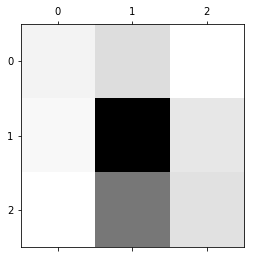

In [35]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
plt.matshow(cm, cmap='binary')

In [54]:
print('Accuracy: ',accuracy_score(y_test,predictions))
print('Kappa:    ', cohen_kappa_score(predictions,y_test))

Accuracy:  0.5929818063978519
Kappa:     0.14538424478346168


### Gridsearch CV

In [36]:
y_train  = list(y_train)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

NameError: name 'sc' is not defined

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}


In [ ]:
y_train

In [37]:
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1'}
accuracy : 0.5921361260853463


In [42]:
logreg2=LogisticRegression(C=0.1,penalty="l1")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.592950943629153


In [44]:
predictions = logreg2.fit(X_train,y_train).predict(X_test)

In [45]:
predictions

array([2, 2, 1, ..., 2, 2, 2])

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.60      0.26      0.36      6252
           2       0.60      0.89      0.72     36960
           3       0.55      0.18      0.28     21591

   micro avg       0.59      0.59      0.59     64803
   macro avg       0.58      0.44      0.45     64803
weighted avg       0.58      0.59      0.53     64803



In [49]:
print(confusion_matrix(y_test,predictions))

[[ 1616  4456   180]
 [ 1012 32822  3126]
 [   64 17540  3987]]


In [ ]:
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
#plot_confusion_matrix(cm, normalize=True, title='Normalized confusion matrix')
#plt.show()

plot_confusion_matrix(cm,classes= labels normalize=True,
                      title='Normalized confusion matrix')
plt.show()


In [50]:
print('Accuracy: ',accuracy_score(y_test,predictions))
print('Kappa:    ', cohen_kappa_score(predictions,y_test))

Accuracy:  0.592950943629153
Kappa:     0.14491218912090742


### KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier

### Create a KNN model instance with n_neighbors=5

### Fit this KNN model to the training data.

In [38]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [39]:
y_train  = list(y_train)

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Predictions and Evaluation

#### Use the predict method to predict values using your KNN model and X_test.

In [30]:
pred = knn.predict(X_test)

In [ ]:
sum(pred == 3)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(confusion_matrix(y_test,pred))

[[ 2213  3723   316]
 [ 1456 29880  5624]
 [  119 12407  9065]]


In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.58      0.35      0.44      6252
           2       0.65      0.81      0.72     36960
           3       0.60      0.42      0.50     21591

   micro avg       0.64      0.64      0.64     64803
   macro avg       0.61      0.53      0.55     64803
weighted avg       0.63      0.64      0.62     64803



In [36]:
print('Accuracy: ',accuracy_score(y_test,pred))
print('Kappa:    ', cohen_kappa_score(pred,y_test))

Accuracy:  0.6351249170563091
Kappa:     0.28772972087265325


#### Choosing a K Value

#### Let's go ahead and use the elbow method to pick a good K Value!

#### ** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [ ]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

#### Now create the following plot using the information from your for loop.

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

###  Retrain with new K Value
Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.

In [29]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30, weights='uniform')

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[ 2213  3723   316]
 [ 1456 29880  5624]
 [  119 12407  9065]]




NameError: name 'classification_report' is not defined

In [ ]:
print('Accuracy: ',accuracy_score(y_test,pred))
print('Kappa:    ', cohen_kappa_score(pred,y_test))

### kNN in a GridSearchCV

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [63]:
y_train  = list(y_train)

In [61]:
grid_params = {
    'n_neighbors':[3,5,11,19],
    'weights':['uniform', 'distance'],
    'metric': ['manhattan']
}

gs=       GridSearchCV(
          KNeighborsClassifier(),
          grid_params,
          verbose =1,
           cv=3,
           n_jobs = -1)



In [65]:
X_train

array([[-1.3891018 , -0.98317386, -1.24320225, ..., -0.14888611,
        -0.0361696 , -0.11927599],
       [-1.62043234, -0.48496037,  0.0839259 , ..., -0.14888611,
        -0.0361696 , -0.11927599],
       [ 0.66942421, -0.11130026, -0.95743378, ..., -0.14888611,
        -0.0361696 , -0.11927599],
       ...,
       [-1.21444032,  0.88512671, -0.54088991, ..., -0.14888611,
        -0.0361696 , -0.11927599],
       [ 0.41961428, -0.360407  , -1.37882118, ..., -0.14888611,
        -0.0361696 , -0.11927599],
       [ 1.662828  , -0.360407  , -1.30616818, ..., -0.14888611,
        -0.0361696 , -0.11927599]])

In [64]:
gs_results = gs.fit(X_train[1:1000,],  y_train[1:1000])

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    2.0s finished


In [66]:
gs_results.best_score_

0.5675675675675675

In [67]:
gs_results.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [70]:
gs_results

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance'], 'metric': ['manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [73]:
predictions = gs_results.predict(X_test)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.45      0.22      0.30      6252
           2       0.59      0.81      0.69     36960
           3       0.48      0.24      0.32     21591

   micro avg       0.57      0.57      0.57     64803
   macro avg       0.51      0.43      0.44     64803
weighted avg       0.54      0.57      0.53     64803



In [75]:
print(confusion_matrix(y_test,predictions))

[[ 1398  4521   333]
 [ 1455 30047  5458]
 [  231 16114  5246]]


In [76]:
print('Accuracy: ',accuracy_score(y_test,predictions))
print('Kappa:    ', cohen_kappa_score(predictions,y_test))

Accuracy:  0.5661929231671373


NameError: name 'cohen_kappa_score' is not defined

### Training a Decision Tree Model
Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [54]:
from sklearn.tree import DecisionTreeClassifier

#### Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [55]:
dtree = DecisionTreeClassifier()

In [56]:
y_train  = list(y_train)

In [57]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predictions and Evaluation of Decision Tree
Create predictions from the test set and create a classification report and a confusion matrix.

In [58]:
predictions = dtree.predict(X_test)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.48      0.49      0.48      6252
           2       0.70      0.69      0.70     36960
           3       0.59      0.61      0.60     21591

   micro avg       0.64      0.64      0.64     64803
   macro avg       0.59      0.60      0.59     64803
weighted avg       0.65      0.64      0.64     64803



In [61]:
print(confusion_matrix(y_test,predictions))

[[ 3056  2728   468]
 [ 2911 25525  8524]
 [  433  8008 13150]]


[[ 3056  2728   468]
 [ 2911 25525  8524]
 [  433  8008 13150]]


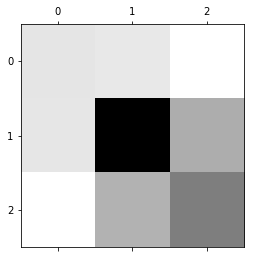

In [62]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
plt.matshow(cm, cmap='binary')

In [63]:
print('Accuracy: ',accuracy_score(y_test,predictions))
print('Kappa:    ', cohen_kappa_score(predictions,y_test))

Accuracy:  0.6439671002885669
Kappa:     0.3613650440364855


### Training the Random Forest model
Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
RF = RandomForestClassifier()
def RF_param_selection(X, y, nfolds):
   trees = [50,55,60,65,70,75,80,85,90,95,100]
   param_grid = {'n_estimators': trees}
   grid_search = GridSearchCV(RF, param_grid, cv=nfolds)
   grid_search.fit(X, y)
   grid_search.best_params_
   return grid_search.best_params_

In [66]:
RF_param_selection(X_train,y_train, 5)

{'n_estimators': 95}

In [67]:
rfc = RandomForestClassifier(n_estimators=95)

In [69]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=95, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [70]:
predictions = rfc.predict(X_test)

In [71]:
predictions

array([1, 2, 1, ..., 2, 3, 2])

#### Predictions and Evaluation
Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [72]:
predictions = rfc.predict(X_test)

### Now create a classification report from the results

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.67      0.45      0.54      6252
           2       0.72      0.84      0.77     36960
           3       0.73      0.58      0.65     21591

   micro avg       0.72      0.72      0.72     64803
   macro avg       0.70      0.62      0.65     64803
weighted avg       0.72      0.72      0.71     64803



#### Show the Confusion Matrix for the predictions.

In [75]:
print(confusion_matrix(y_test,predictions))

[[ 2787  3343   122]
 [ 1247 31102  4611]
 [  125  8927 12539]]


[[ 2787  3343   122]
 [ 1247 31102  4611]
 [  125  8927 12539]]


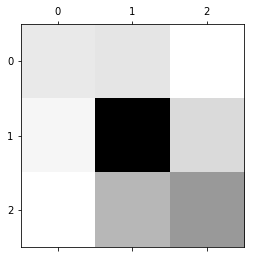

In [76]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
plt.matshow(cm, cmap='binary')

In [78]:
print('Accuracy: ',accuracy_score(y_test,predictions))
print('Kappa:    ', cohen_kappa_score(predictions,y_test))

Accuracy:  0.7164483125781214
Kappa:     0.45812645405986574


In [ ]:
test_values = pd.read_csv(DATA_DIR / 'test_values.csv', index_col='building_id')

### Support Vector Machines

In [22]:
from sklearn.svm import SVC

In [23]:
y_train  = list(y_train)

In [24]:

classifier = SVC(kernel = 'linear', random_state = 0)


In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
 #Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

### Model Evaluation

In [ ]:
predictions = svc_model.predict(X_test)

In [ ]:
predictions1= clf.predict(X_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions1))

In [62]:
print(classification_report(y_test,predictions1))

NameError: name 'predictions1' is not defined

### Gridsearch Practice

In [22]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1,1, 10, 100],'kernel': ['linear'], 'gamma': [1,0.1,0.01,0.001]} 

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

In [ ]:
#Applying Grid Search to find the best model and the best parameters
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [ ]:
accuracy = grid_search.best_score_

In [ ]:

grid_search.best_params_

In [ ]:
classifier = SVC(kernel = 'rbf', gamma=0.7)
classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)